# Digging More Deeply Into Convolutional Networks

## Goals

In these questions students will have an opportunity to explore what happens when an image goes through a convolutional neural network. Students will do the following:

    - Load models into pytorch
    - Visualize an image as it passes through the convolutional network
    

## Dependincies 

In [120]:
# loading code from the assignment
from src.models import Large_Dog_Classifier
from data.my_dataset import MyDataset
from src.run_model import run_model
from data.dogs import DogsDataset
from data.my_dataset import MyDataset

# torch code that we need
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

import os

## Setup

We will be using a pre trained model for this assignment! In the following cell we will load the weights for the pre-trained model. The weights of the model are found in the experiments folder.

You will create a new `Large_Dog_Classifier`, then load the saved weights into the model. <a href="https://pytorch.org/tutorials/beginner/saving_loading_models.html">Here is a link to the PyTorch website with more details. </a>

In [121]:
# students will specify the file path here
model_weights_path = 'experiments/large-CNN'

In [122]:
# Print out the layers of the network
device = "cuda" if torch.cuda.is_available() else "cpu"
model = Large_Dog_Classifier().to(device)

model.eval()

Large_Dog_Classifier(
  (conv1): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(4, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(6, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(8, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(10, 12, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(12, 14, kernel_size=(3, 3), stride=(1, 1))
  (conv7): Conv2d(14, 16, kernel_size=(3, 3), stride=(2, 2))
  (fc1): Linear(in_features=11664, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

In [123]:
# load in the DogSet dataset
test_images = DogsDataset('experiments/DogSet')
test_images = test_images.get_test_examples()


loading train...
loading valid...
loading test...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


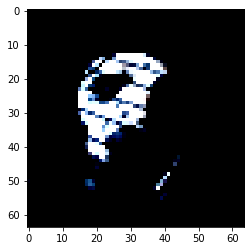

In [124]:
plt.imshow(test_images[0][80])

# Filter Image
Here we load in an image from the test set to visualize it as it passes through the network, try to find a close up of a dog's face for the best results.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


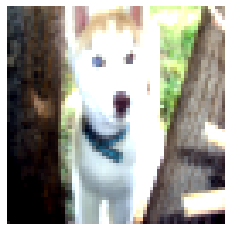

torch.Size([1, 64, 64, 3])


In [140]:
# grab an image from the testing set, it doesn't have to be random.
# if you're having trouble finding a good image we found 86,
img_num = np.random.randint(86)
filter_image = test_images[0][img_num]

# we need to put the image into a tensor since the network expects input to come in batches
# our batch size will be 1
filter_image = torch.tensor([filter_image])

# function to plot our image 
def imshow(img):
    npimg = img.numpy()
    plt.imshow(npimg)
    plt.axis('off')
    plt.show()
filter_image = filter_image/2 +.5

# display the image, students will write this
imshow(filter_image[0])
print(filter_image.shape)

If you filled out the cell above correctly you should see a dog image above

In [141]:
# permute the image just as you did in the homework
filter_image = filter_image.permute(0, 3, 1, 2)

# pass the image through the network and save the output to a variable
filter1 = model.conv1(filter_image)
filter2 = model.conv2(F.relu(filter1))

#we need to detach the gradient variable and convert the tensors to numpy arrays
filter1 = filter1.detach().numpy()
filter2 = filter2.detach().numpy()

# looking at the image shapes here may be helpful in one of the follow up questions
print(f'filter1: {filter1.shape}')
print(f'filter2: {filter2.shape}')
#print(filter1)

filter1: (1, 4, 64, 64)
filter2: (1, 6, 64, 64)


## Visualizing the filters

Here is an included helper function for visualizing the images as they are passed through the network, run this function with your output from the previous cell to see an image pass through the network.

In [144]:
def graph_filters(filters):
    for filter_mat in filters:
        channels = filter_mat.shape[1]
        display_grid = np.zeros((filter_mat.shape[2], channels * filter_mat.shape[2]))
        print(display_grid.shape)
        for i in range(channels):
            x = filter_mat[0, i, :]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            display_grid[:, i * filter_mat.shape[2] : (i + 1) * filter_mat.shape[2]] = x
        
        scale = 40. / channels
        plt.grid(False)
        plt.figure(figsize=(scale * channels, scale))
        plt.axis('off')
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

(64, 4096)


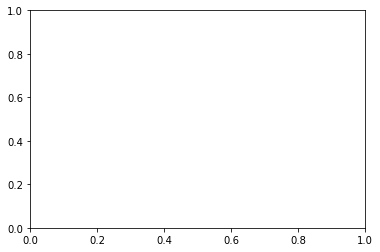

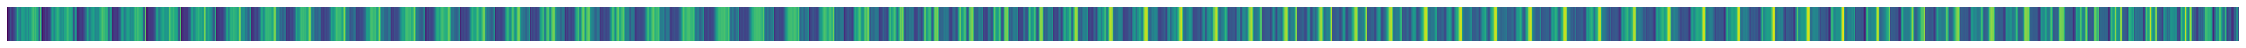

In [146]:
# use this function to view the iamges as they are passed through the CNN
graph_filters(filter2)

## Follow-Up Questions
Please explain the following about the ouput and include your graphs in your write-up.

    - (a) What does each graph of the seven graphs represent? Why are the images repeated several times on each of the seven graphs?
    
    - (b) What do light regions of the graphs indicate? Take your best guess on this question, we want you to think about what's happening in a CNN using what you've learned in class. 

    - (c) What are the ouput dimensons of each of the CNN layers?
